# I. Setting it all up!!


In [ ]:
pip install gspread-dataframe

In [ ]:
# @title Authentication with google
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# With this code, Colab gives you a link: by clicking on it you will access your Google account and will be asked to copy a code and to paste it in the ‘Enter verification code’ box; just like that:

In [ ]:
# @title  IMPORT THESE FIRST: Scikitlearn ....
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import (make_classification, make_blobs, load_breast_cancer, make_regression, make_friedman1,
                              load_iris)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
# from feature_engine.creation import CyclicalFeatures

'''
from data.adspy_shared_utilities import (load_crime_dataset, plot_two_class_knn,
                                         plot_class_regions_for_classifier_subplot,
                                         plot_class_regions_for_classifier,
                                         plot_feature_importances)
                                         '''

In [ ]:
# @title defining my worksheet
worksheet = gc.open('newspaper_data_all').sheet1
#get_all_values gives a list of rows
rows = worksheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(rows)

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
pd.set_option('display.max_colwidth', None) # show the whole column when looking at dataframe
pd.set_option('display.max_rows', None)

In [ ]:
# @title creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

###  converting to different dtypes:

In [ ]:
# @title datetime stuff
from datetime import datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['year'] = df['event_date'].dt.year
df['month_day'] = df['month'].astype(str) + '.' + df['day'].astype(str)

In [ ]:
# @title making crowdsize usable -> numeric
df['crowd_size'] = df['crowd_size'].replace(
    to_replace=[','],
    value='',
    regex=True )

df['crowd_size'] = pd.to_numeric(df['crowd_size'])
df['crowd_size_class'] = pd.to_numeric(df['crowd_size_class'])
df['month_day'] = pd.to_numeric(df['month_day'])
df['district_class'] = pd.to_numeric(df['district_class'])
print(df.dtypes)

# **II. Methods **

#### II.I. KNN + Regression

In [ ]:
np.set_printoptions(precision=2)


feature_names_crowds = ['month_day', 'class_class', 'district_class']
X_crowds = df[feature_names_crowds]
y_crowds = df['crowd_size_class']
target_names_crowds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

X_crowds_2d = df[['event_date', 'class_class']]
y_crowds_2d = df['crowd_size_class']

X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_scaled, y_train) # when fitted it stops the eleven
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_crowd1 = [[5.1, 1.1, 5]]
example_crowd2 = [[2.15, 2.3, 1]]
example_crowd_scaled1 = scaler.transform(example_crowd1)
print('Predicted crowd size for ', example_crowd1, ' is ',
          target_names_crowds[knn.predict(example_crowd_scaled1)[0]-1])

example_crowd_scaled2 = scaler.transform(example_crowd2)
print('Predicted crowd size for ', example_crowd2, ' is ',
          target_names_crowds[knn.predict(example_crowd_scaled2)[0]-1])

# print(knn.predict(X_test))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.34
Predicted crowd size for  [[5.1, 1.1, 5]]  is  9
Predicted crowd size for  [[2.15, 2.3, 1]]  is  1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#### II.I.I Report

In [ ]:
# @title classification report + confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_test)
print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.16      0.31      0.21        36
           2       0.03      0.45      0.06        11
           3       0.48      0.10      0.16       112
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.12       234
   macro avg       0.06      0.08      0.04       234
weighted avg       0.26      0.12      0.11       234

CONFUSION MATRIX
[[11 18  7  0  0  0  0  0  0  0  0]
 [ 4  5  2  0  0  0  0  0  0  0  0]
 [40 61 11  0  0  0  0  0  0  0  0]
 [ 6 17  0  0  0  0  0  0  0  0  0]
 [ 2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

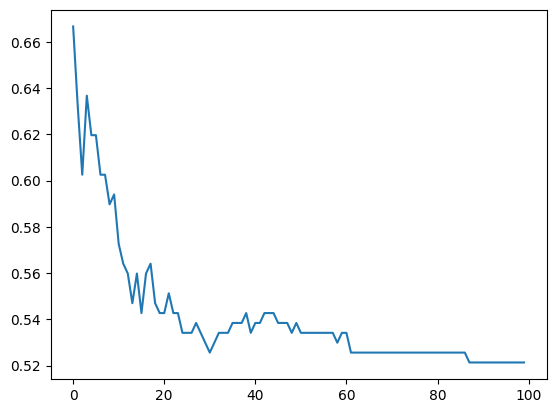

In [ ]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)

In [ ]:
# @title runs training set amazing but test set very bad result like: -0.687 and 0.065
X_train, X_test, y_train, y_test = train_test_split(X_crowds, y_crowds, random_state = 0)
# trained and fitted at the same time
knnreg = KNeighborsRegressor(n_neighbors = 1).fit(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

'''
example_crowd = [[5.1, 1.1, 5]]
example_crowd_scaled = scaler.transform(example_crowd)
print('Predicted crowd size for ', example_crowd, ' is ',
          target_names_crowds[knnreg.predict(example_crowd_scaled)[0]-1])
'''
print(knnreg.predict(X_test))
print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 1.  3.  6.  9.  3.  8.  3.  9.  5.  1.  2.  4.  3.  3.  3.  1.  3.  6.
  3.  3.  3.  3.  4.  3.  3.  4.  5.  4.  3.  4.  4. 11.  6.  4.  6.  3.
  1.  1.  1.  3.  3.  3.  3.  9.  6.  9.  3.  2.  3.  3.  3.  6.  3.  4.
  3.  1.  9.  4.  2.  4.  1. 10.  3.  3.  3.  2.  1.  3.  4.  1.  3.  4.
  6.  6.  3.  8.  1.  3.  3.  3.  8.  3.  9.  3.  3.  3.  9.  9.  1.  1.
  6.  9.  3.  3.  1.  6.  5.  8.  3.  8.  3.  1.  3.  3.  3.  7.  6.  3.
  5.  5.  6.  5.  3.  3.  3.  3.  8.  3.  9.  2.  3.  4.  3.  4.  2.  6.
  3.  3.  1.  2.  3.  6.  3.  2.  6.  7.  6.  3.  1.  3.  1.  1.  5.  5.
  3.  2.  3.  4.  7.  4.  5.  9.  4.  9.  4.  6.  6.  3.  6.  3.  3.  3.
  5.  6.  5.  7.  6.  1.  3.  3.  3.  1.  3.  6.  5.  4.  3.  3.  1.  1.
  1.  5.  6.  5.  3.  3.  5.  7.  3.  8.  3.  3.  3.  7.  3.  1.  4.  3.
  3.  8.  1.  3.  3.  9.  3.  5.  5.  7.  4.  1.  3.  3.  1.  3.  5.  3.
  1.  1.  5.  3.  4.  5.  3.  7.  3.  3.  1.  3.  3.  3.  3.  5.  1.  3.
  6.  6.  2.  8.  5.  3.  3.  7.  4.  3.  3.  3.  6

In [ ]:
# @title classification report + confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = knnreg.predict(X_test)
print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.29      0.25      0.27        40
           2       0.09      0.06      0.07        16
           3       0.58      0.51      0.54       139
           4       0.29      0.31      0.30        29
           5       0.21      0.29      0.24        21
           6       0.15      0.25      0.19        16
           7       0.00      0.00      0.00        12
           8       0.08      0.11      0.10         9
           9       0.08      0.14      0.10         7
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.35       292
   macro avg       0.16      0.17      0.17       292
weighted avg       0.38      0.35      0.36       292

CONFUSION MATRIX
[[10  1 20  3  2  1  1  1  0  1  0]
 [ 3  1  6  1  1  0  1  2  1  0  0]
 [17  3 71 13 10 13  2  3  6  0  1]
 [ 2  0  7  9  3  3  2  2  1  0  0]
 [ 1

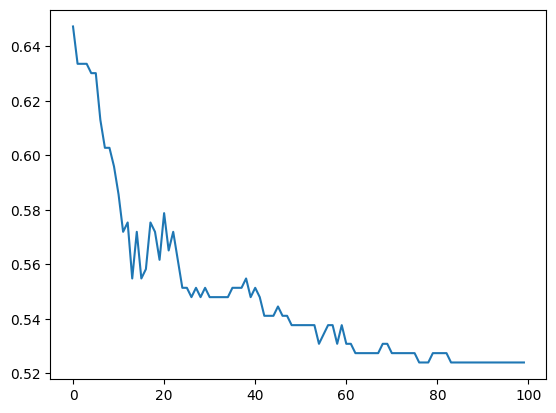

In [ ]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))
plt.plot(error_rates)

### II.I.II. Validation

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_crowds.to_numpy()
y = y_crowds.to_numpy()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

In [ ]:
print(test_scores)

In [ ]:
# This code based on scikit-learn validation_plot example
# See: http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

# I.  Saving it to Files

### saving it sheets

In [ ]:
#ONLY RUN WHEN 100% SURE YOU WANNA CHANGE SHARED DATA SET !!!
from gspread_dataframe import set_with_dataframe
set_with_dataframe(worksheet, df)


## csv

In [ ]:

# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd drive/MyDrive/FindMyProtest/Data

In [ ]:
df.to_csv('newspaper.csv', sep= '\t')

In [ ]:
'''
import pandas as pd
df = pd.read_csv("newspaper24.03.csv",  on_bad_lines='warn')
df.head()
'''

## json

In [ ]:

# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/FindMyProtest/Data

/content/drive/MyDrive/FindMyProtest/Data


In [ ]:
df.to_json('WDnewspaper.json')


In [ ]:
df24.to_json('newspaper24.json')
df23.to_json('newspaper23.json')
df22.to_json('newspaper22.json')
df21.to_json('newspaper21.json')
